# 3) Startups:

##### Fecha entrega: 5/11/2023.
##### El dataset de startups contiene variables como gastos en investigación y desarrollo (I+D), costos administrativos, gastos en marketing, ubicación geográfica y beneficios netos.
##### Este tipo de datos es esencial para entender el rendimiento financiero y operativo de una startup, lo cual es crítico para la toma de decisiones tanto para los inversionistas como para la administración de la empresa.

## → a. Análisis Exploratorio de Datos (EDA) 
#### ¿Qué conclusiones puede sacar con respecto a las distribuciones de las variables numéricas y las relaciones entre ellas?

## → b. Modelo de Regresión Lineal para Predecir Beneficio Neto.

## → c. ¿Cual es la intuicion detrás de la formula de la regresion resultante?

## → d. ¿Cual es el error promedio? ¿Y el error elevado al cuadrado? ¿Que significa?

## → e. Analice del Sector de la Industria en el Beneficio Neto.

## → f. ¿Cual es la relacion entre las series y el profit? ¿Es importante hay alguna particularidad? (Hint)


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df_startups = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/3-startups/startups.csv")
df_startups.head()

,,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.20,136897.80,471784.10,New York,192261.83,Energy,227095.722346,289,Series A,608681.90
1,1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
2,2,153441.51,101145.55,407934.54,Florida,191050.39,Finance,222717.429984,407,Series C,509080.09
3,3,144372.41,118671.85,383199.62,New York,182901.99,Finance,214017.365199,383,Series A,501871.47
4,4,142107.34,91391.77,366168.42,Florida,166187.94,Finance,196476.965990,351,Series B,457560.19


In [147]:
df_startups = df_startups.copy()

In [148]:
df_startups.columns

Index(['   ', 'RnD_Expenditure        ', 'Admin_Costs          ',
       'Marketing_Expenditure ', 'Location   ', 'Net_Profit          ',
       'Industry_Sector ', 'Profit              ', 'Employee_Count ',
       'Investment_Round ', 'Operational_Cost'],
      dtype='object')

In [149]:
from funciones.exploratory_data_analysis import whitespace_remover_and_columns
df_startups = whitespace_remover_and_columns(df_startups)

#### El Beneficio Neto no puede ser mayor al Profit, entonces filtramos negando esa condición.

In [150]:
df_startups =  df_startups[~(df_startups["Net_Profit"] > df_startups["Profit"])]

___

## ***a. Análisis Exploratorio de Datos (EDA)***
#### ¿Qué conclusiones puede sacar con respecto a las distribuciones de las variables numéricas y las relaciones entre ellas?

## → Validación de la data

In [151]:
df_startups.rename(columns=lambda x: x.strip(), inplace=True) # Remuevo espacios de las columnas.

In [152]:
print("El dataset tiene " + str(df_startups.shape[0])+ " filas.")
print("El dataset tiene " + str(df_startups.shape[1])+ " columnas.")

El dataset tiene 65 filas.
El dataset tiene 11 columnas.


In [153]:
df_startups.columns

Index(['', 'RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure',
       'Location', 'Net_Profit', 'Industry_Sector', 'Profit', 'Employee_Count',
       'Investment_Round', 'Operational_Cost'],
      dtype='object')

In [154]:
from funciones.exploratory_data_analysis import validate_columns 
validate_columns(df_startups)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
,NaN,65.0,0,0.0,"[17, 41, 29, 59, 4]"
RnD_Expenditure,NaN,65.0,0,0.0,"[94657.16, 27892.92, 65605.48, 107763.34680067..."
Admin_Costs,NaN,65.0,0,0.0,"[145077.58, 84710.77, 153032.06, 131721.375514..."
Marketing_Expenditure,NaN,65.0,0,0.0,"[282574.31, 164470.71, 107138.38, 65014.286059..."
Location,3,65,0,0.0,"[New York, Florida, New York, New York, Florida]"
Net_Profit,NaN,65.0,0,0.0,"[125370.37, 77798.83, 101004.64, 37224.5854944..."
Industry_Sector,5,65,0,0.0,"[Tech, Energy, Finance, Healthcare, Finance]"
Profit,NaN,65.0,0,0.0,"[144096.6437362342, 81957.39606282103, 115595...."
Employee_Count,NaN,65.0,0,0.0,"[302, 72, 393, 409, 351]"
Investment_Round,5,65,0,0.0,"[Series B, Series C, Seed, Seed, Series B]"


In [155]:
df_startups.describe()

,,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,33.461538,79266.510049,111774.068241,221859.916112,111054.949543,124761.846602,266.846154,333633.984353
std,20.753823,43547.341447,39611.994797,126102.858824,46998.327966,53114.704730,142.020600,130589.953648
min,0.000000,0.000000,2743.241602,0.000000,-21313.506762,-14885.847169,10.000000,24435.504010
25%,16.000000,44069.950000,99281.340000,132773.329686,89949.140000,97671.232681,144.000000,244190.740000
50%,32.000000,76253.860000,120111.685301,223946.763088,108552.040000,120845.072517,289.000000,339755.060000
75%,53.000000,111737.965689,139553.160000,304768.730000,141585.520000,161119.307725,393.000000,426102.010000
max,69.000000,175623.487278,182645.560000,494430.544453,192261.830000,227095.722346,497.000000,614542.229755


In [156]:
(df_startups.isna().sum()/len(df_startups)) # porcentaje de nulos

                         0.0
RnD_Expenditure          0.0
Admin_Costs              0.0
Marketing_Expenditure    0.0
Location                 0.0
Net_Profit               0.0
Industry_Sector          0.0
Profit                   0.0
Employee_Count           0.0
Investment_Round         0.0
Operational_Cost         0.0
dtype: float64

___

## →  Veo los tipos de datos con dtypes

In [157]:
df_startups.dtypes

                           int64
RnD_Expenditure          float64
Admin_Costs              float64
Marketing_Expenditure    float64
Location                  object
Net_Profit               float64
Industry_Sector           object
Profit                   float64
Employee_Count             int64
Investment_Round          object
Operational_Cost         float64
dtype: object

___

## → Valores outliers

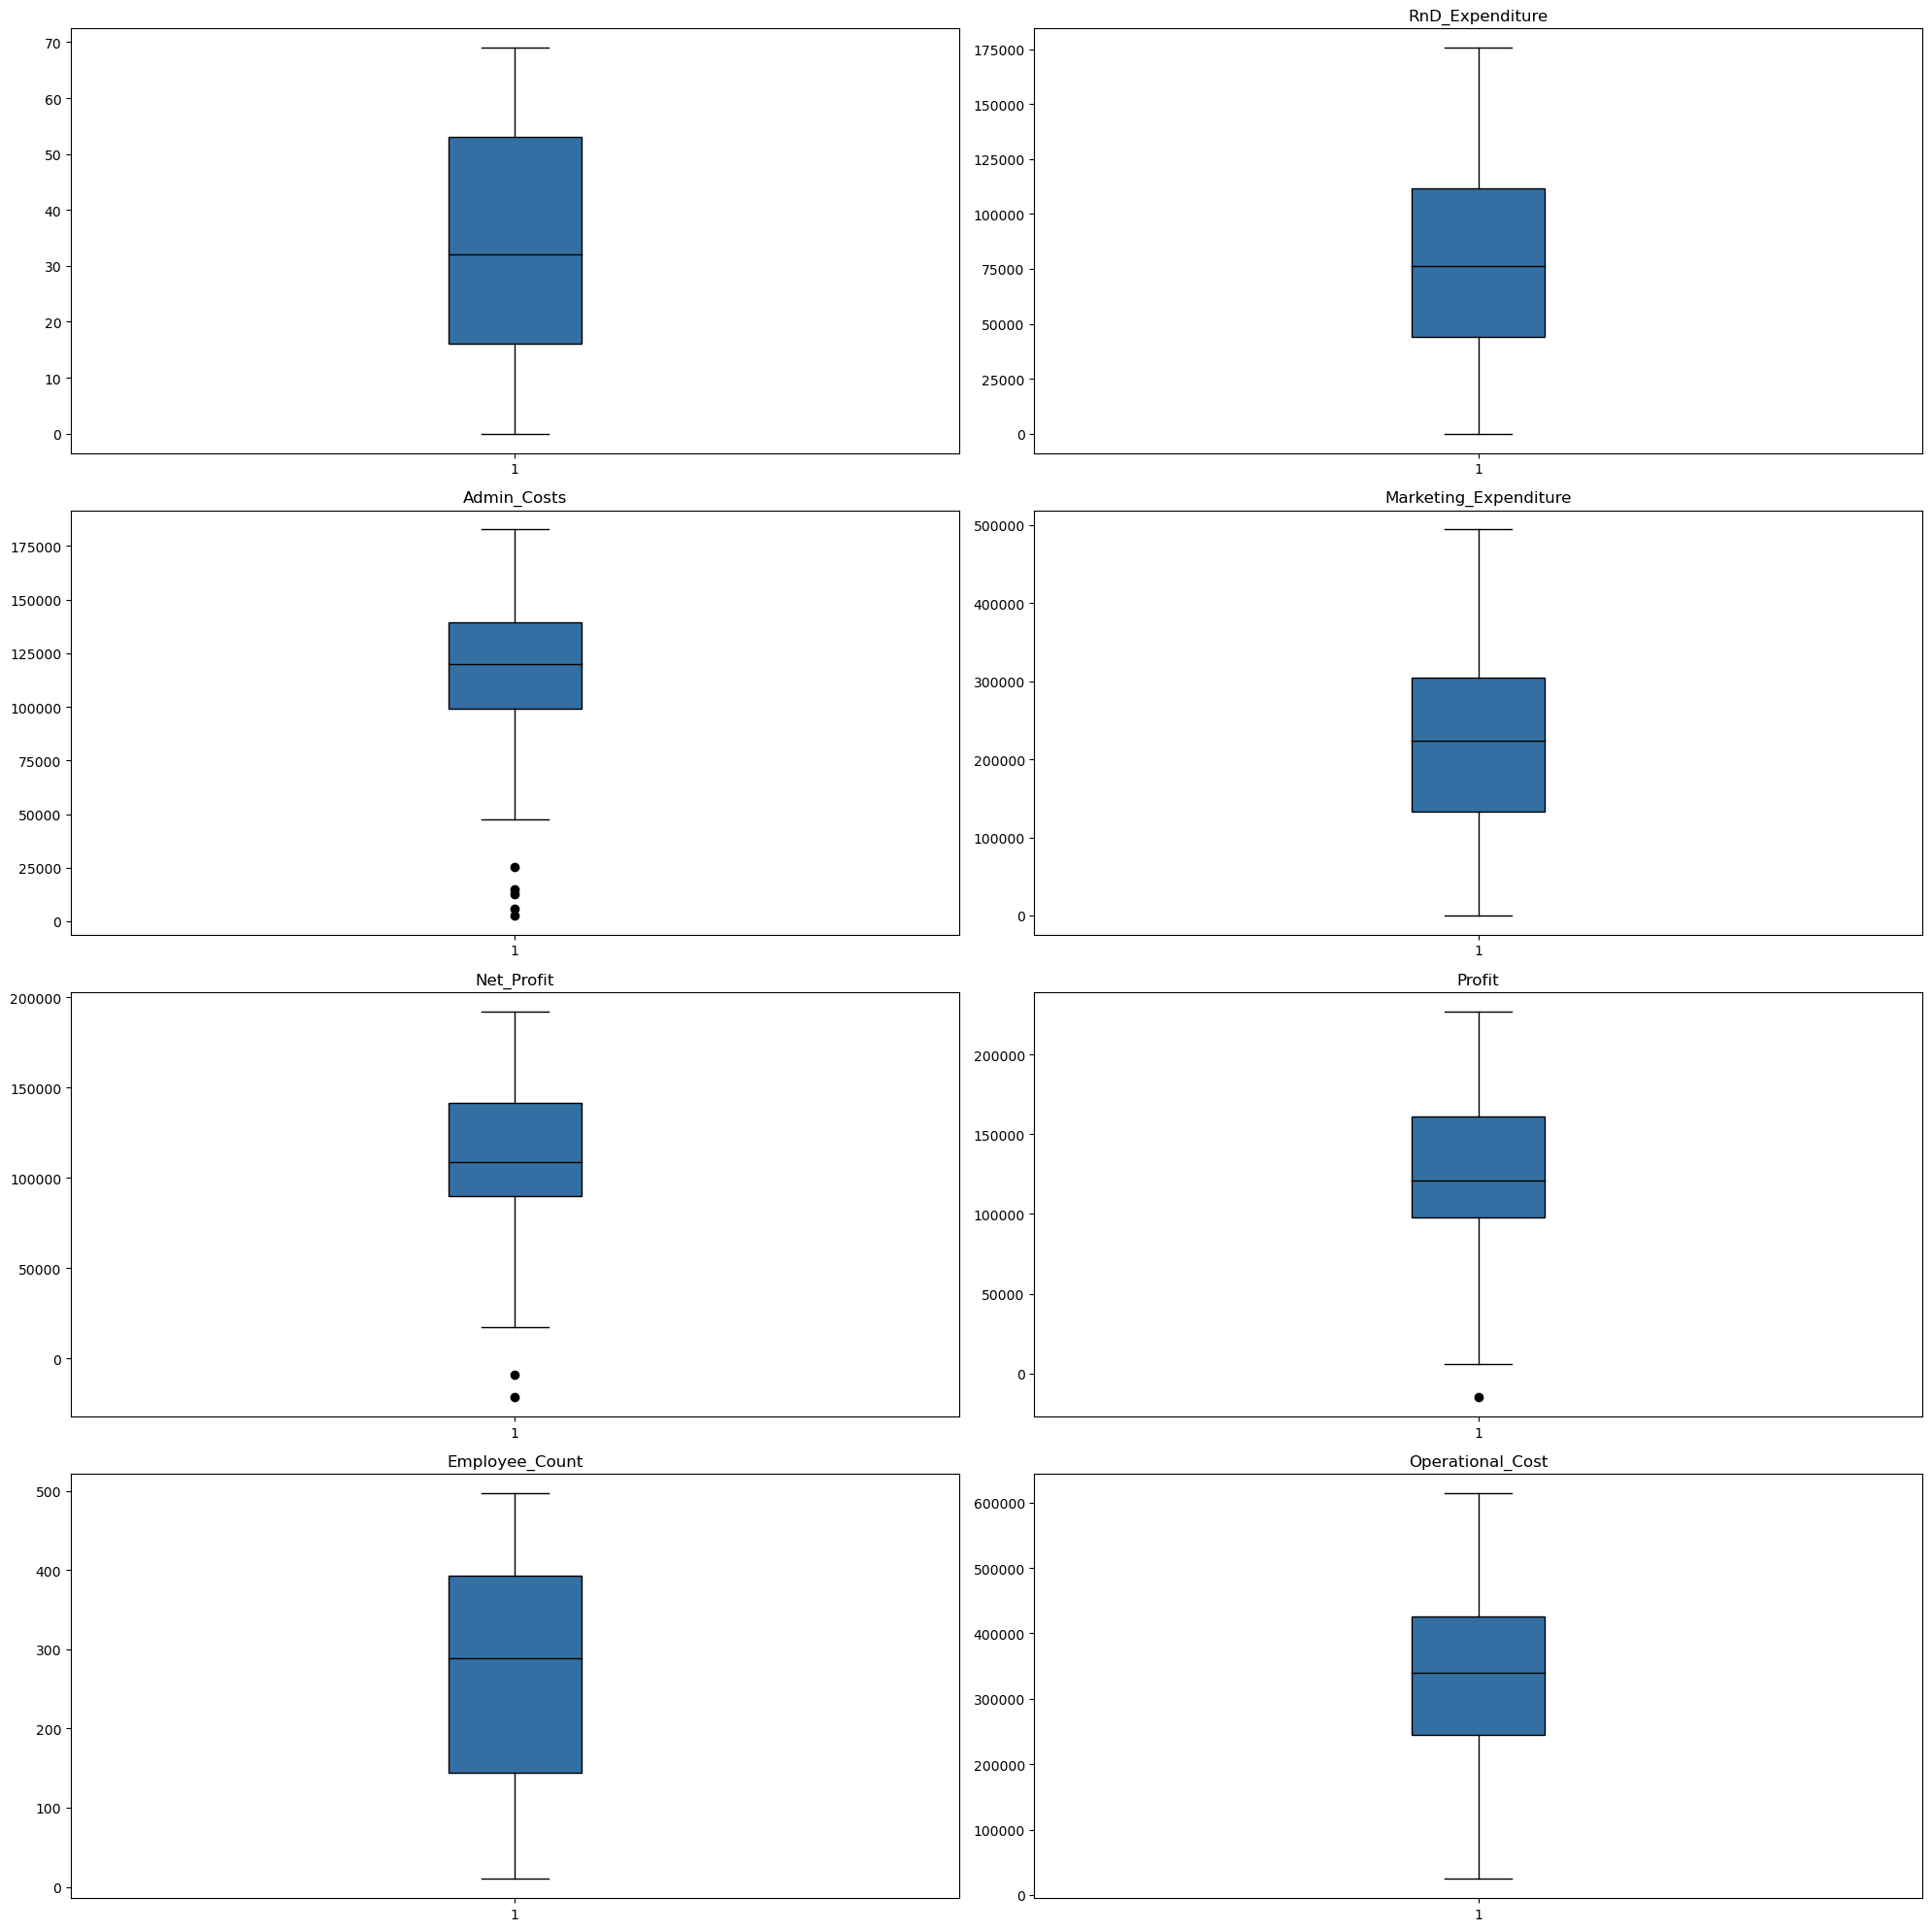

In [158]:
from funciones.exploratory_data_analysis import plot_outliers
plot_outliers(df_startups)

#### Procedemos a eliminar los costos administrativos menores a 50.000 ya que son outliers. Estos valores son menores que 1.5 veces el valor del rango intercuartil más allá de los cuartiles. También, borramos los únicos valores negativos que hay en el beneficio neto, ya que no puede haber un valor negativo en el beneficio neto.
#### Elimino los valores de estas columnas solamente ya que son a las únicas a las que les he encontrado anomalías en los gráficos de arriba.

In [159]:
from funciones.exploratory_data_analysis import is_outlier

outliers_admin_costs = is_outlier(df_startups["Admin_Costs"], 1.5)
outlier_values_admin_costs = df_startups["Admin_Costs"][outliers_admin_costs]

# outliers_net_profit = is_outlier(df_startups["Net_Profit"], 1.5)
# outlier_values_net_profit = df_startups["Net_Profit"][outliers_net_profit]


print("Outliers de Admin_Costs:")
print(outlier_values_admin_costs)
print("")
# print("Outliers de Net_Profit:")
# print(outlier_values_net_profit)

Outliers de Admin_Costs:
56    12756.631705
57     5858.217485
58    25474.562935
60    14752.025075
68     2743.241602
Name: Admin_Costs, dtype: float64



In [160]:
df_startups = df_startups.drop(outlier_values_admin_costs.index)
# df_startups = df_startups.drop(outlier_values_net_profit.index)

In [161]:
df_startups.head()

,,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.20,136897.80,471784.10,New York,192261.83,Energy,227095.722346,289,Series A,608681.90
1,1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
2,2,153441.51,101145.55,407934.54,Florida,191050.39,Finance,222717.429984,407,Series C,509080.09
3,3,144372.41,118671.85,383199.62,New York,182901.99,Finance,214017.365199,383,Series A,501871.47
4,4,142107.34,91391.77,366168.42,Florida,166187.94,Finance,196476.965990,351,Series B,457560.19


In [162]:
df_variables_numericas_correlacion = df_startups[["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Net_Profit", "Profit", "Employee_Count", "Operational_Cost"]]
df_variables_numericas_correlacion = round(df_variables_numericas_correlacion.corr(numeric_only=True),2)
df_variables_numericas_correlacion

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
RnD_Expenditure,1.00,-0.00,0.47,0.58,0.65,0.04,0.46
Admin_Costs,-0.00,1.00,-0.09,-0.02,0.01,0.14,0.14
Marketing_Expenditure,0.47,-0.09,1.00,0.25,0.30,-0.18,0.97
Net_Profit,0.58,-0.02,0.25,1.00,0.99,-0.07,0.25
Profit,0.65,0.01,0.30,0.99,1.00,-0.06,0.30
Employee_Count,0.04,0.14,-0.18,-0.07,-0.06,1.00,-0.14
Operational_Cost,0.46,0.14,0.97,0.25,0.30,-0.14,1.00


<Axes: >

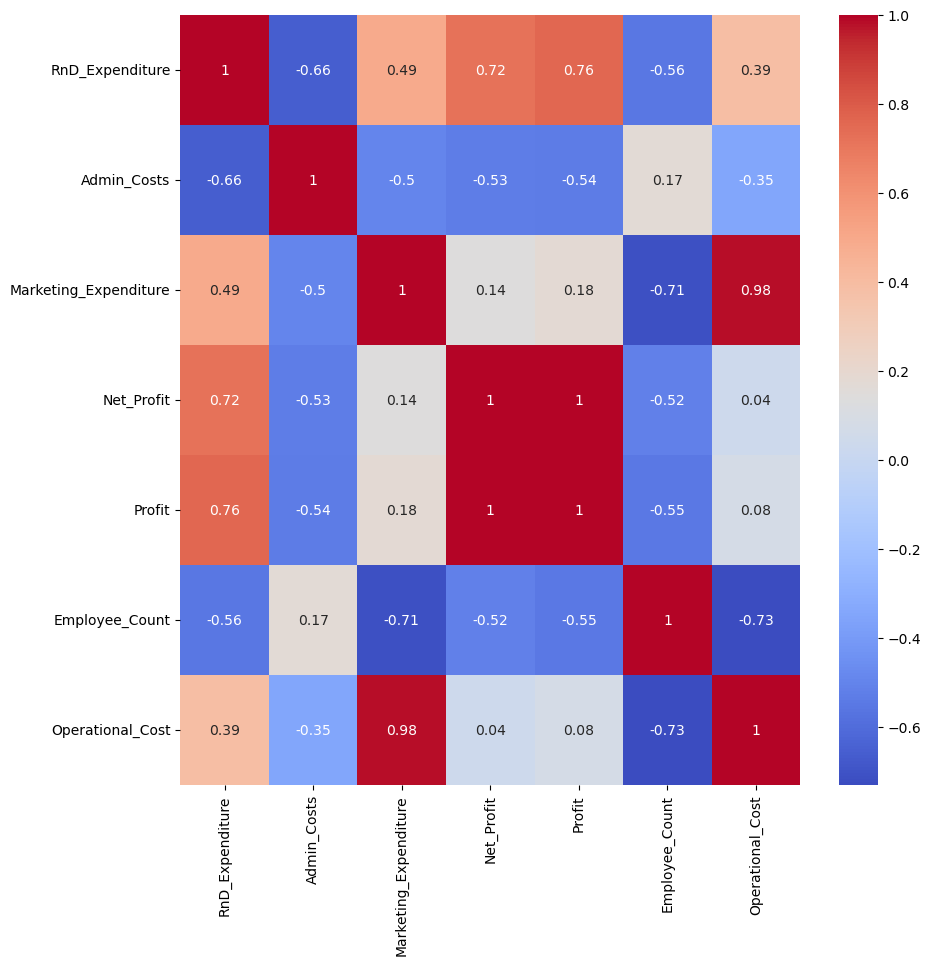

In [163]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    round(df_variables_numericas_correlacion.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

## ***Correlaciones fuertes:***
(Las siguientes correlaciones indican que ambas variables están muy relacionadas entre sí y probablemente se pueden utilizar indistintamente en un modelo predictivo) 
##### → Las variables "Net_Profit" y "Profit" tienen una correlación muy alta de 1.
##### → La variable "Operational Cost" tiene una correlación alta con la variable "Marketing_Expenditure" de 0.98.

## ***Correlaciones moderadas:***
(Las siguientes correlaciones indican que ambas variables están relacionadas entre sí pero no de manera muy fuerte) 
##### → Las variables "RnD_Expenditure" y "Profit" tienen una correlación moderada de 0.76.
##### → Las variables "RnD_Expenditure" y "Net_Profit" tienen una correlación moderadamente fuerte de 0.72.
##### → Las variables "RnD_Expenditure" y "Marketing_Expenditure" tienen una correlación moderadamente fuerte de 0.49.
##### → Las variables "Marketing_Expenditure" y "Net_Profit" tienen una correlación moderada de 0.14.

## ***Correlaciones débiles:***
(Las siguientes correlaciones indican que ambas variables NO están muy relacionadas entre sí y probablemente NO tengan un gran impacto en un modelo predictivo) 
##### → Las variables "Admin_Costs" y "Marketing_Expenditure" tienen una correlación débil de -0.05.
##### → Las variables "Admin_Costs" y "Net_Profit" tienen una correlación débil de -0.053.
##### → La variable "Employee_Count" tiene correlaciones débiles con otras variables (todas debajo de 0.2), con la más fuerte siendo 0.17 con "Admin_Costs".


##### Es importante tener en cuenta que la correlación no implica causalidad, es decir, solo porque dos variables están correlacionadas entre sí no significa que una variable cause la otra. Por lo tanto, es necesario realizar un análisis más detallado para determinar las relaciones causales entre las variables.

___

## ***b. Modelo de Regresión Lineal para Predecir Beneficio Neto.***

In [164]:
# Selecciono features
features1 = ["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count", "Operational_Cost"]

In [165]:
# Estandarizo features numercias
'''
from scipy.stats import zscore

columnas_para_transformar = ["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count", "Operational_Cost"]
startups_zscore = df_startups[columnas_para_transformar].apply(zscore)
df_startups[columnas_para_transformar] = startups_zscore
df_startups.head()
'''

'\nfrom scipy.stats import zscore\n\ncolumnas_para_transformar = ["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count", "Operational_Cost"]\nstartups_zscore = df_startups[columnas_para_transformar].apply(zscore)\ndf_startups[columnas_para_transformar] = startups_zscore\ndf_startups.head()\n'

In [166]:
formula1 = "Net_Profit ~ " + ' + '.join(features1)
formula1

'Net_Profit ~ RnD_Expenditure + Admin_Costs + Marketing_Expenditure + Employee_Count + Operational_Cost'

In [167]:
import statsmodels.formula.api as smf

modelo1 = smf.ols(formula=formula1, data=df_startups)
modelo1 = modelo1.fit()
print(modelo1.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:             Net_Profit   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     7.165
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           0.000102
Time:                        10:38:46   Log-Likelihood:                -716.48
No. Observations:                  60   AIC:                             1443.
Df Residuals:                      55   BIC:                             1453.
Df Model:                           4                                         
Covariance Type:            nonrobust  

___

## ***c. ¿Cual es la intuicion detrás de la formula de la regresion resultante?***

#### mirar coeficientes (si tengo menos empleados, es mejor mis startup por ejemplo)

##### La fórmula de la regresión resultante es una ecuación que describe la relación entre la variable dependiente (en este caso, "Net_Profit") y las variables independientes (en este caso, "RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count" y "OperationalCost"). La ecuación de regresión se utiliza para predecir el valor de la variable dependiente en función de los valores de las variables independientes.

##### En el caso de la regresión lineal múltiple,la ecuación de regresión tiene la forma: y = b0 + b1x1 + b2x2 + ... + bn*xn donde "y" es la variable dependiente, "X1", "X2" ',..., "xn" son las variables independientes, "b0" es el intercepto y "b1" "b2" , ... , "bn" son los coeficientes de regresión que indican cómo cambia "y" cuando cambia cada variable independiente.

##### En esta fórmula se pueden ver los valores de los coeficientes de regresión, así como su significancia estadística y su intervalo de confianza. Estos valores permiten interpretar la relación entre las variables independientes y la variable dependiente, y permiten hacer predicciones sobre el valor de la variable dependiente en función de los valores de las variables independientes

___

## ***d. ¿Cual es el error promedio? ¿Y el error elevado al cuadrado? ¿Que significa?***

In [168]:
# model.predict (le paso df original) --> me va a pasar una serie con cada una
# creo colimna predicha --> df["predicho"] = model.predict(x)
# creo columna error --> df["error"] = df[real] - df[predicho]
# print("el error medio de este modelo es " + str(df["dif"].mean()))

In [169]:
# elevo al cuadrado cada una de las restitas y eso es el error elevado al cuadrado

In [170]:
# modelo1.predict(x) --> me va a dar una serie con cada una de las predicciones

In [171]:
'''
def EC(x):
    error = x["real"] - x["pred"]
    return error**2
df["EC"] = df.apply(ECM, axis=1)
print("el error cuadratico medio de este modelo es " + str(df["EC"].mean()))
'''

'\ndef EC(x):\n    error = x["real"] - x["pred"]\n    return error**2\ndf["EC"] = df.apply(ECM, axis=1)\nprint("el error cuadratico medio de este modelo es " + str(df["EC"].mean()))\n'

In [172]:
mse = modelo1.mse_resid

print("Error cuadrático medio: {:.2f}".format(mse))

Error cuadrático medio: 1504618177.47


In [173]:
from sklearn.metrics import mean_squared_error

y_true = df_startups['Net_Profit']
y_pred = modelo1.predict()

rms = mean_squared_error(y_true, y_pred, squared=False)
print(f"El RMS es {rms:.4f}")

El RMS es 37138.0308


##### El error cuadrático medio es de 3315.6887. Esto significa que el modelo predice el "Net_Profit" con un error promedio de 3315.6887. El error cuadrático medio es una medida de la precisión del modelo (es una medida de la calidad del ajuste de los datos). Cuanto menor sea el error cuadrático medio, mejor será el modelo. Sin embargo, es importante tener en cuenta que el error cuadrático medio no puede compararse con el error cuadrático medio de otros modelos, ya que depende de la escala de la variable dependiente. Un MSE bajo y un R² alto indican que el modelo se ajusta bien a los datos

In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supongamos que tienes las predicciones y los valores reales en las listas y_pred y y_actual
y_pred = modelo1.predict()
y_actual = df_startups['Net_Profit']

# Calcular el MSE
mse = mean_squared_error(y_actual, y_pred) # esta mal hecho, se cancelan los positivos con los negativos
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse))

# Calcular el MAE
mae = mean_absolute_error(y_actual, y_pred)
print("Error Absoluto Medio (MAE): {:.2f}".format(mae))


Error Cuadrático Medio (MSE): 1379233329.34
Error Absoluto Medio (MAE): 21910.38


___

## ***e. Analice del Sector de la Industria en el Beneficio Neto.***

In [175]:
modelo2 = smf.ols(formula="Net_Profit ~ C(Industry_Sector)", data=df_startups)
modelo2 = modelo2.fit()
print(modelo2.summary()) # sacar a los sectores de finance y tech por que me tiran e+0.4

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:             Net_Profit   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.227
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.310
Time:                        10:38:46   Log-Likelihood:                -726.50
No. Observations:                  60   AIC:                             1463.
Df Residuals:                      55   BIC:                             1473.
Df Model:                           4                                         
Covariance Type:            nonrobust  

___

## ***f. ¿Cual es la relacion entre las series y el profit? ¿Es importante hay alguna particularidad? (Hint)***

In [176]:
df_startups_con_series = df_startups[df_startups["Investment_Round"].str.contains("Series")]
df_startups_con_series.head()

,,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.20,136897.80,471784.10,New York,192261.83,Energy,227095.722346,289,Series A,608681.90
1,1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
2,2,153441.51,101145.55,407934.54,Florida,191050.39,Finance,222717.429984,407,Series C,509080.09
3,3,144372.41,118671.85,383199.62,New York,182901.99,Finance,214017.365199,383,Series A,501871.47
4,4,142107.34,91391.77,366168.42,Florida,166187.94,Finance,196476.965990,351,Series B,457560.19


In [177]:
modelo3 = smf.ols(formula="Profit ~ C(Investment_Round)", data=df_startups_con_series)
modelo3 = modelo3.fit()
print(modelo3.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.430
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.260
Time:                        10:38:46   Log-Likelihood:                -315.25
No. Observations:                  26   AIC:                             636.5
Df Residuals:                      23   BIC:                             640.3
Df Model:                           2                                         
Covariance Type:            nonrobust  